In [35]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt; plt.rcdefaults() 
import pandas.plotting as scatter_matrix 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [68]:
#file: Placement_Summary
df = pd.read_csv('C:\\Users\\diyas\\Documents\\Recommendation_system\\vppyh-mao32.csv',skipinitialspace=True) 
df.head()

,SRN,Name,Mobile,Email,Program,Branch,CGPA,Placement Status,CompanyName,CTC,TierLevel,Reason
0,01FB14EBT900,MADHURIMA.M,8.095684e+09,rima.madgula@gmail.com,B.Tech,BT,0.00,Not Placed,NaN,NaN,NaN,NaN
1,01FB14ECS036,ANUJAY SHARMA,NaN,anujay96@gmail.com,B.Tech,CSE,6.58,Not Intersted,NaN,NaN,NaN,Planning For Higher Studies
2,01FB14ECV045,MANJU SUBHASH PARITALA,8.088431e+09,manju.subhash.ms@gmail.com,B.Tech,CV,6.42,Not Intersted,NaN,NaN,NaN,Planning For Higher Studies
3,01FB14EEC188,SHREYAS M R,9.845743e+09,shreyas.22796@gmail.com,B.Tech,ECE,5.94,Not Intersted,NaN,NaN,NaN,Planning For Higher Studies
4,01FB14EME056,GAGGERA VENKATA SRIHARSHA,9.985781e+09,gaggerasriharsha215@gmail.com,B.Tech,ME,5.17,Not Intersted,NaN,NaN,NaN,Seeking Job


In [69]:
#Removing unneccessary columns and null tier values
df = df[df['Placement Status'] == "Placed"]
df = df[df['Branch'] == "CSE"]
df=df.drop(['Mobile', 'SRN','Name','Reason','Email','Placement Status','Program'], axis=1)
df = df[df['TierLevel'].notnull()]

In [53]:
df.describe()

,CGPA,CTC,TierLevel
count,263.000000,2.630000e+02,263.000000
mean,8.661065,1.185872e+06,1.357414
std,0.805427,8.122932e+05,0.540014
min,6.090000,3.500000e+04,1.000000
25%,8.205000,6.500000e+05,1.000000
50%,8.830000,9.000000e+05,1.000000
75%,9.235000,1.400000e+06,2.000000
max,9.960000,4.800000e+06,3.000000


In [54]:
df.Branch.unique()

array(['CSE'], dtype=object)

In [55]:
df.groupby('TierLevel').mean()

,CGPA,CTC
TierLevel,,
1.0,8.948983,1.485778e+06
2.0,8.160513,5.980962e+05
3.0,7.171250,2.812500e+05


In [56]:
df.corr()

,CGPA,CTC,TierLevel
CGPA,1.000000,0.426920,-0.551799
CTC,0.426920,1.000000,-0.524863
TierLevel,-0.551799,-0.524863,1.000000


In [57]:
#split into stratas based on tier
df1 = df[df['TierLevel'] == 1]
df2 = df[df['TierLevel'] == 2]
df3 = df[df['TierLevel'] == 3]

In [58]:
#Count of samples in each Strata
print("Tier 1 count",len(df1))
print("Tier 2 count",len(df2))
print("Tier 3 count",len(df3))

Tier 1 count 177
Tier 2 count 78
Tier 3 count 8


Tier 1


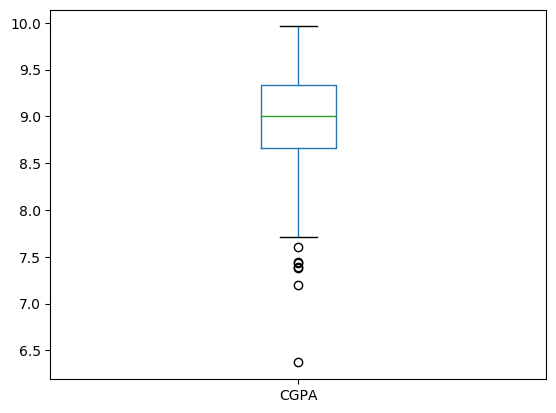

Tier 1 mean CGPA 8.948983050847458

 Tier 2


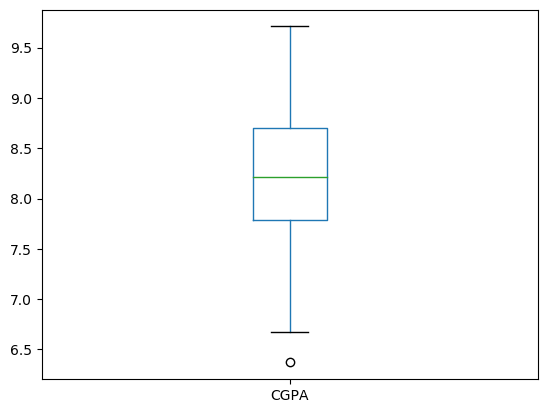

Tier 2 mean CGPA 8.160512820512821

 Tier 3


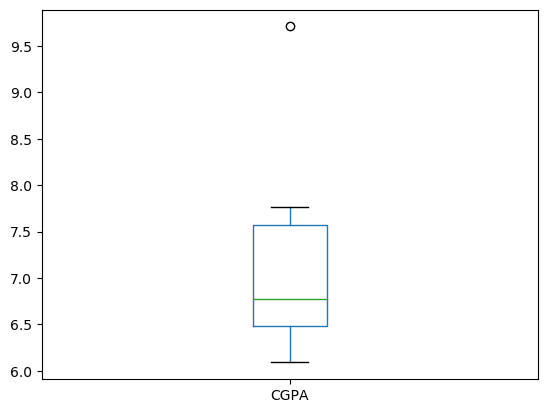

Tier 1 mean CGPA 7.171250000000001


In [59]:
#CGPA Patterns

#boxplot for tier 1
print("Tier 1")
path1 = pd.DataFrame(df1.CGPA) 
ax = path1.plot.box() 
plt.show() 
mean1=np.mean(df1["CGPA"])
print("Tier 1 mean CGPA",mean1)

#boxplot for tier 2
print("\n Tier 2")
path2 = pd.DataFrame(df2.CGPA) 
ax = path2.plot.box() 
plt.show() 
mean2=np.mean(df2["CGPA"])
print("Tier 2 mean CGPA",mean2)

#boxplot for tier 3
print("\n Tier 3")
path3 = pd.DataFrame(df3.CGPA) 
ax = path3.plot.box() 
plt.show() 
mean3=np.mean(df3["CGPA"])
print("Tier 1 mean CGPA",mean3)


TIER 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

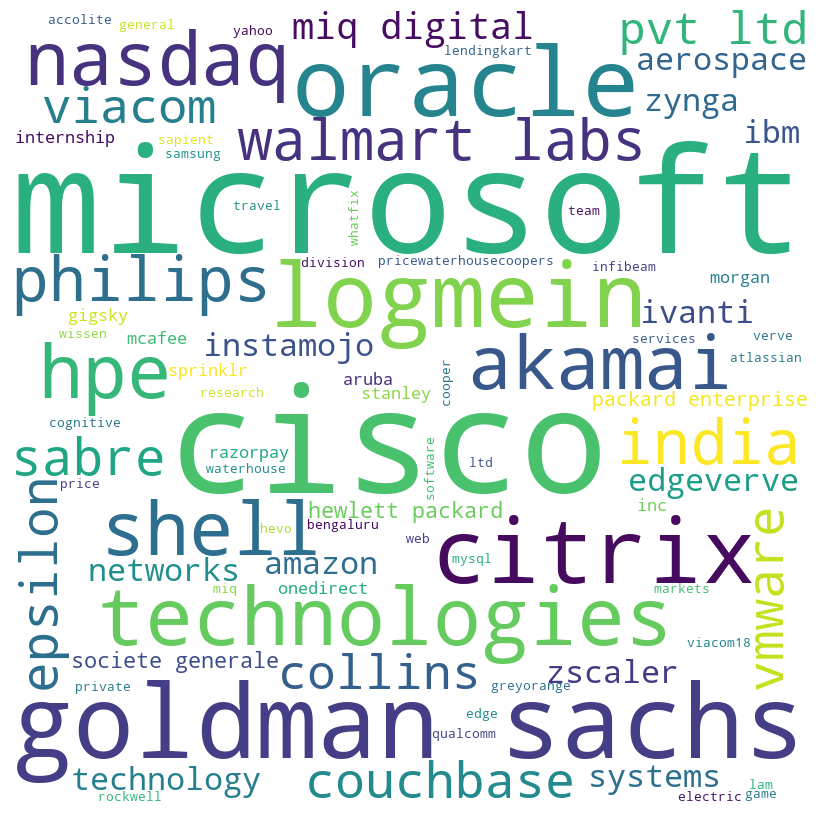

In [60]:
#Companies for each Strata

print("TIER 1")
for i in ['CompanyName']: 
    df1[i] = df1[i].replace(np.nan," ") 
    df1[i]= df1[i].replace("nan"," ")
    df1[i]= df1[i].replace("NaN"," ")
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1.CompanyName: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

TIER 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

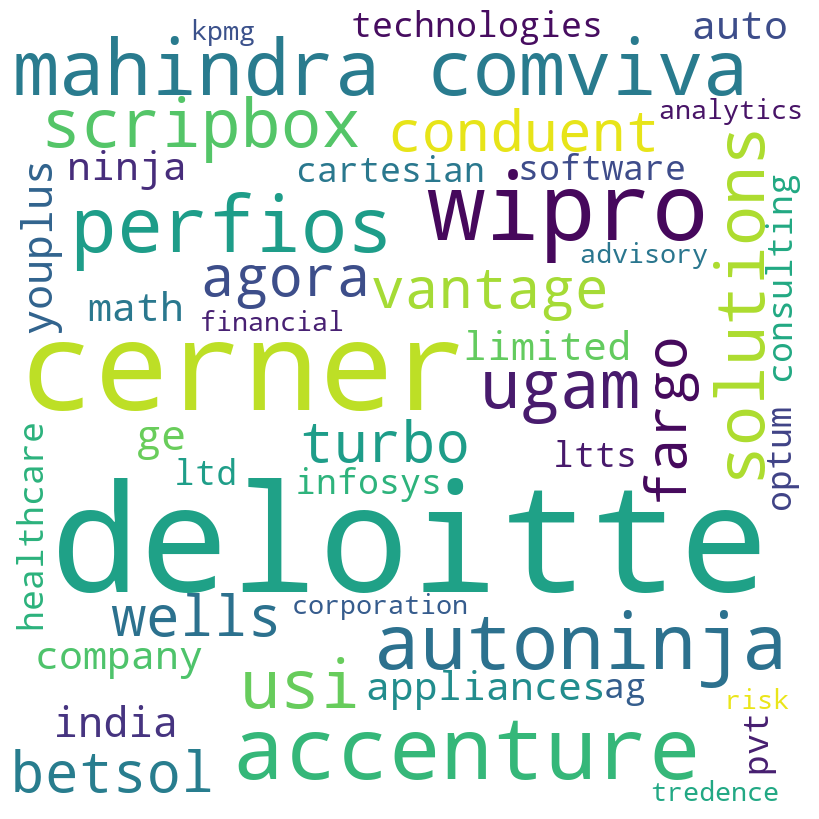

In [61]:
print("TIER 2")
for i in ['CompanyName']: 
    df2[i] = df2[i].replace(np.nan," ") 
    df2[i]= df2[i].replace("nan"," ")
    df2[i]= df2[i].replace("NaN"," ")
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df2.CompanyName: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

TIER 3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

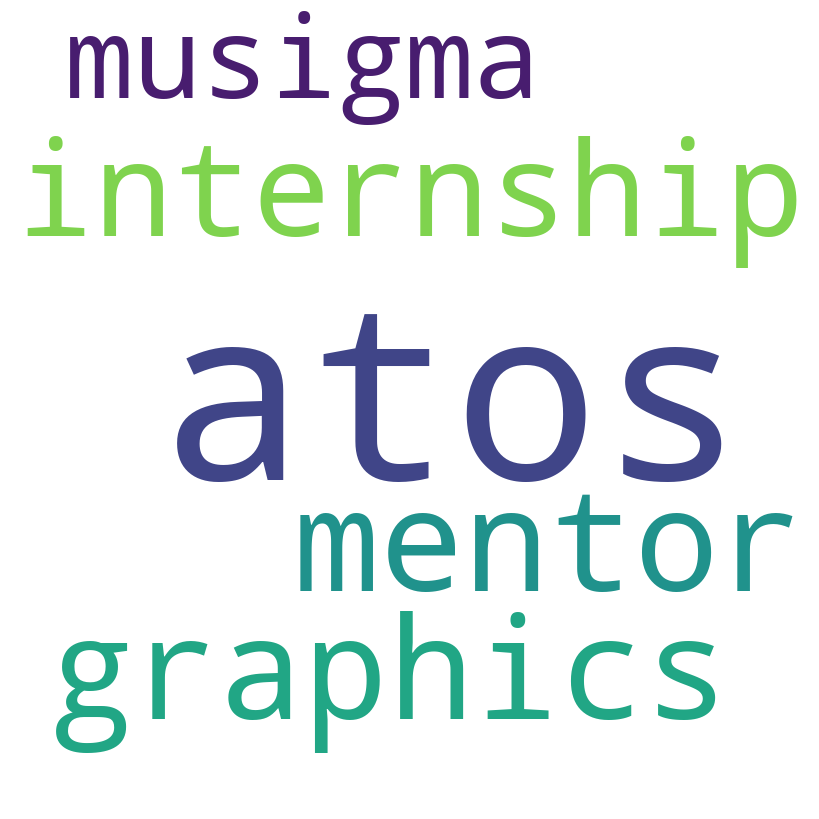

In [62]:
print("TIER 3")
for i in ['CompanyName']: 
    df3[i] = df3[i].replace(np.nan," ") 
    df3[i]= df3[i].replace("nan"," ")
    df3[i]= df3[i].replace("NaN"," ")
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df3.CompanyName: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [63]:
#Company 
print("Tier 1")
df1['CompanyName'].value_counts()

Tier 1


Microsoft                        11
Goldman Sachs                     7
Cisco                             7
HPE                               6
Oracle                            6
Citrix                            6
Walmart Labs                      5
LogMeIn                           5
Nasdaq                            4
Philips                           4
Societe Generale                  3
Couchbase                         3
Ivanti                            3
VMware                            3
Instamojo                         3
Epsilon                           3
Collins Aerospace                 3
McAfee                            2
MiQ Digital                       2
Zscaler                           2
Edgeverve                         2
Amazon                            2
Viacom                            2
Akamai Technology                 2
OneDirect                         2
Viacom 18                         2
Sabre                             2
Morgan Stanley              

In [64]:
print("Tier 2")
df2['CompanyName'].value_counts()

Tier 2


Deloitte                                13
Cerner                                  10
Autoninja                                4
Accenture                                4
Mahindra Comviva                         3
Perfios                                  3
Wipro                                    2
Wipro Turbo                              2
Betsol                                   2
Deloitte USI                             2
Scripbox                                 2
Vantage agora                            1
Deloitte-USI                             1
Cerner HealthCare Solutions              1
Mahindra comviva                         1
Ugam                                     1
Ugam Solutions                           1
Accenture                                1
GE Appliances                            1
Deloitte Risk and Financial Advisory     1
Tredence Analytics                       1
Cerner Corporation                       1
Wipro Limited                            1
Optum      

In [65]:
print("Tier 3")
df3['CompanyName'].value_counts()

Tier 3


Atos                           4
Musigma                        1
Atos                           1
ATOS                           1
Mentor Graphics, Internship    1
Name: CompanyName, dtype: int64

Tier 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


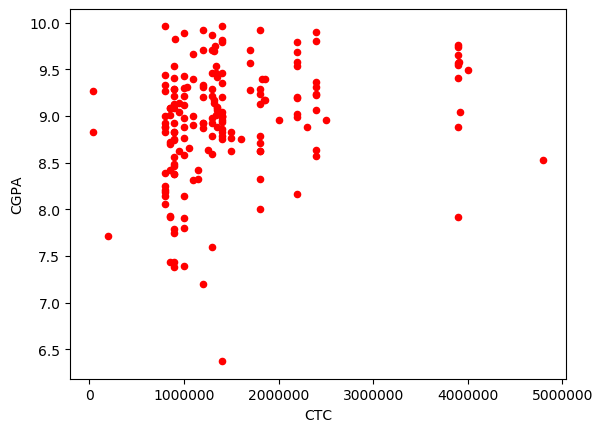

Tier 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


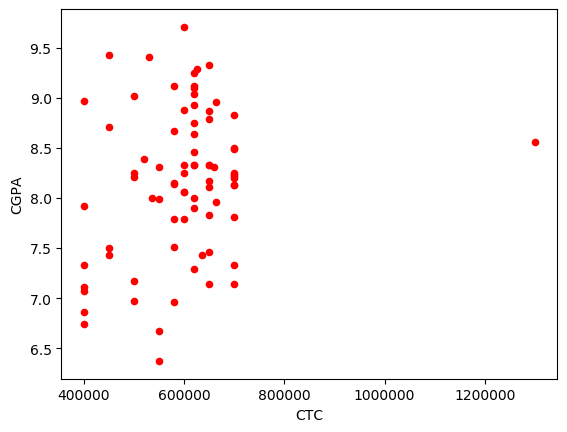

Tier 3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


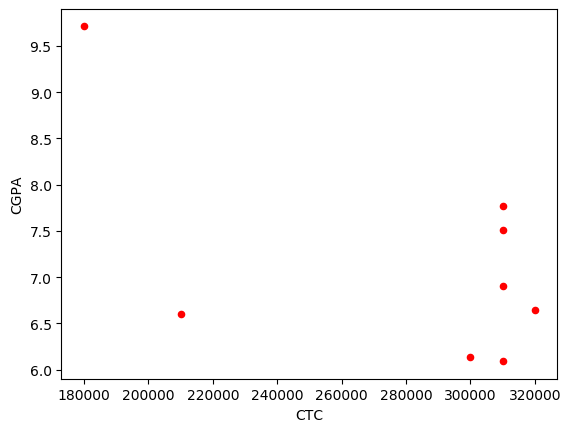

In [66]:
#clustering of CTC
print("Tier 1")
df1["CTC"] = df1["CTC"].astype(int)
df1.plot(kind='scatter',x='CTC', y='CGPA',color='red')
plt.show()

print("Tier 2")
df2["CTC"] = df2["CTC"].astype(int)
df2.plot(kind='scatter',x='CTC', y='CGPA',color='red')
plt.show()


print("Tier 3")
df3["CTC"] = df3["CTC"].astype(int)
df3.plot(kind='scatter',x='CTC', y='CGPA',color='red')
plt.show()

Tier 1
Tier 2
Tier 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F7B4E5358>]],
      dtype=object)

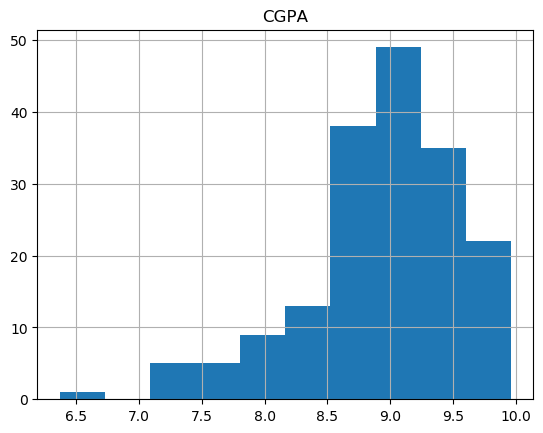

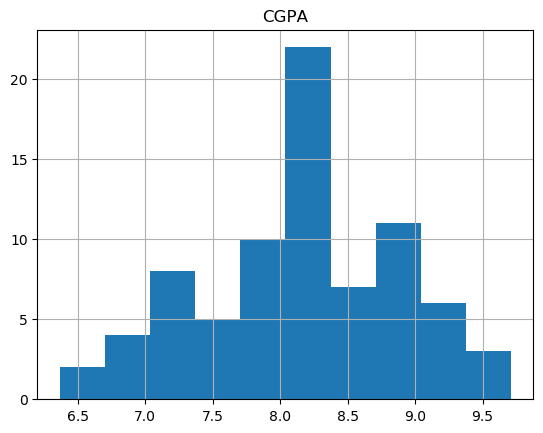

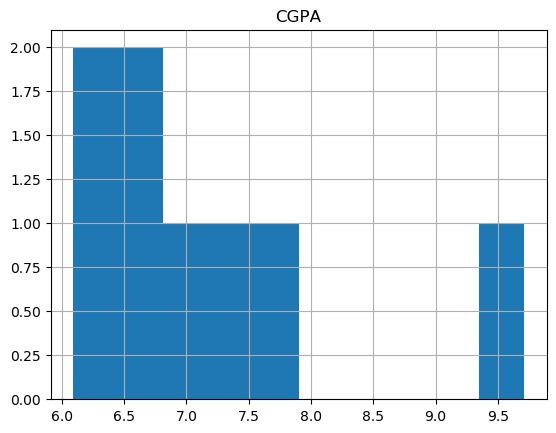

In [67]:
#CGPA 
print("Tier 1")
df1.hist(column=["CGPA"])

print("Tier 2")
df2.hist(column=["CGPA"])

print("Tier 3")
df3.hist(column=["CGPA"])